In [4]:
from numpy.linalg import qr, svd

from scipy.linalg import hadamard, subspace_angles

import math

import jax
import jax.numpy as jnp
from jax import grad, random, vmap
import optax

import os
import sys
parent_dir = os.path.dirname(os.getcwd())  # Get the parent directory
sys.path.append(parent_dir)
from kernel_sca_inducing_points import *
from utils import *
from kernels import *
import jPCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV

import wandb

In [5]:
#X = np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/psth.npy").swapaxes(1,2) 
X = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/train_spksmth.npy').swapaxes(1,2)
X, _ = pre_processing(X, soft_normalize='max', center=False, pca=False)
K, N, T = X.shape
A = jnp.swapaxes(X, 0, 1)                
A = A.reshape(N,-1)    

c = 30
d = 3

In [6]:
X.shape

(1721, 182, 35)

In [5]:
np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/X_softNormMax_centerTrue_pcaFalse_spikes.npy').shape

(1721, 30, 35)

In [7]:
np.save('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/X_softNormMax_centerFalse_pcaFalse_spikes', X)
np.save('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/A_softNormMax_centerFalse_pcaFalse_spikes', A)

In [ ]:
kernel_function = K_X_Y_squared_exponential

wandb.init(project="SCA-project-MC_Maze", name="", mode="disabled")
params, ls_loss, ls_S_ratio = optimize(X, A, iterations=5000, learning_rate=1e-3, d=d, c=c, kernel_function=kernel_function)
wandb.finish()

get_loss_fig(ls_loss, ls_S_ratio)

_, u, l2 = get_params(params, kernel_function=kernel_function)
K_u_u_K_u_A_alpha_H  = get_alpha(params, A, X, kernel_function, d)

X_reshaped = X.swapaxes(0,1).reshape(N,-1)
K_u_X = K_X_Y_squared_exponential(u, X_reshaped, l2=l2).reshape(-1,K,T).swapaxes(0,1)  
Y = jnp.einsum('ji,kjm->kim',  K_u_u_K_u_A_alpha_H, K_u_X)
Y = center(Y)

plot_3D(Y[:,:,:])
plt.title(f's = {compute_S_all_pairs(Y)}')

In [ ]:
test = np.load('/Users/ariellerosinski/My Drive/params_4d_gaussian.npy', allow_pickle=True).tolist()

0.069217555


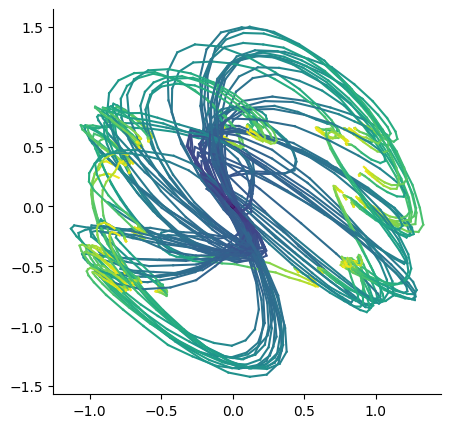

In [25]:
test = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_psth/Y_pca_2d_behaviour.npy')
plot_2D(test)
print(compute_S_all_pairs(jnp.array(test)))

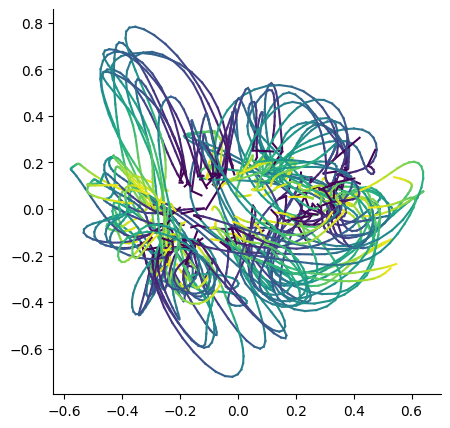

In [3]:
plot_2D( np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_psth/Y_pca_2d.npy") )

In [5]:
pca_variance_captured

array([0.1537977 , 0.11750001, 0.07709902, 0.07201292, 0.06436612,
       0.04355825, 0.04204386, 0.03679934, 0.03264692, 0.0308856 ],
      dtype=float32)

In [7]:
np.cumsum(pca_variance_captured)

array([0.1537977 , 0.2712977 , 0.34839672, 0.42040962, 0.48477575,
       0.528334  , 0.5703779 , 0.6071772 , 0.63982415, 0.6707097 ],
      dtype=float32)

In [6]:
var_explained(X_pca, PCs.T)

0.6707099578003985

In [2]:
np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_psth/var_explained.npy')

array([0.1537977 , 0.11750001, 0.07709902, 0.07201292, 0.06436612,
       0.04355825, 0.04204386, 0.03679934, 0.03264692, 0.0308856 ],
      dtype=float32)

In [10]:
pca_variance_captured

array([0.06287383, 0.05517129, 0.04303841, 0.03689523, 0.03504113,
       0.02748702, 0.02595155, 0.02491823, 0.02390279, 0.02055901],
      dtype=float32)

In [11]:
#np.save(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_spikes/var_explained', pca_variance_captured)

In [12]:
np.cumsum(pca_variance_captured)

array([0.04633601, 0.07690533, 0.10692794, 0.12932666, 0.1495822 ,
       0.16802846, 0.18503642, 0.20050758, 0.2139437 , 0.22653767],
      dtype=float32)

In [9]:
test = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_spikes/softNorm/Y_pca_3d_spikes.npy')
print(f's = {compute_S_all_pairs(jnp.array(test))}')

s = 0.017469173297286034


In [11]:
np.cumsum(pca_variance_captured)[1:]

array([0.28563142, 0.36928916, 0.44042674, 0.49956927, 0.5470368 ,
       0.5929471 , 0.63724834, 0.67601734, 0.71121955], dtype=float32)

In [10]:
np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/results/R2/psth_hand_vel/ls_var_explained_sca.npy')

array([0.25246513, 0.3046044 , 0.32901794, 0.51521885, 0.55223   ,
       0.57286185, 0.60605866, 0.70890105, 0.7420284 ], dtype=float32)

Text(0.5, 1.0, 's = 0.3048311471939087')

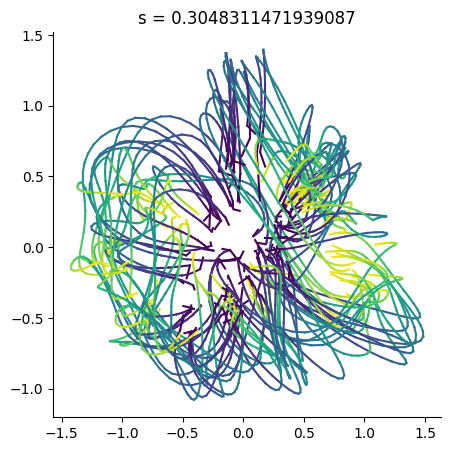

In [8]:
X_pca = np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/psth.npy").swapaxes(1,2)
#X_pca = np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/Churchland/churchland.npy") #.swapaxes(1,2)
#X_pca = np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/behaviour/aug_behaviour.npy")
#X_pca = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/train_spksmth.npy').swapaxes(1,2)
K, N, T = X_pca.shape
#X_pca, _ = pre_processing(X_pca, soft_normalize='max', pca=False, center=True)
X_pca, _ = pre_processing(X_pca, soft_normalize='max', pca=True, center=True)
X_reshaped = X_pca.swapaxes(1,2).reshape(-1, 30)

num_pcs = 10
pca = PCA(num_pcs)
Y_pca = pca.fit(X_reshaped).transform(X_reshaped) #train, test 
PCs = pca.components_
Y_pca = Y_pca.reshape(K, T, num_pcs).swapaxes(1,2) #split
pca_variance_captured = pca.explained_variance_ratio_

plot_2D(Y_pca)
plt.title(f's = {compute_S_all_pairs(jnp.array(Y_pca))}')
#plt.title(f"pca {var_explained(X_pca, PCs.T):.2f}")
#np.save(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_spikes/Y_pca_{num_pcs}d', Y_pca)


#np.save(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/pca_psth/SoftNorm/var_explained', pca_variance_captured)

variance captured ratio 0.3315856089549271


Text(0.5, 1.0, 's = 0.4527822732925415')

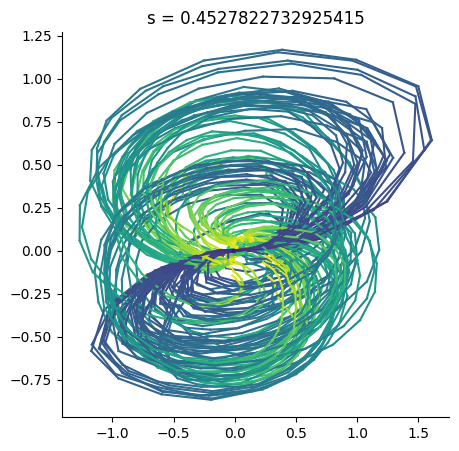

In [2]:
""" jPCA """
#X = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/train_spksmth.npy').swapaxes(1,2)
#X = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/psth.npy').swapaxes(1,2)
X = np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/behaviour/aug_behaviour.npy")
X_jpca, _ = pre_processing(X, soft_normalize='max', num_pcs=6)
X_jpca_ls = [X_jpca[i].T for i in range(X_jpca.shape[0])]
times = np.arange(-250, 450, 20).tolist()   

num_jpcs=2
jpca = jPCA.JPCA(num_jpcs=num_jpcs)
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(X_jpca_ls, times=times, tstart=times[0], tend=times[-1], soft_normalize=0, subtract_cc_mean=False, pca=False) 

jpcs = jpca.jpcs
print(f"variance captured ratio {var_explained(X_jpca, jpcs)}")                 #:.2f

Y_jpca = jnp.array((X_jpca_ls @ jpcs).swapaxes(1,2))
#print(f's = {compute_S_all_pairs(Y_jpca)}')

plot_2D(Y_jpca)
plt.title(f's = {compute_S_all_pairs(Y_jpca)}')
#plt.savefig(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/jpca_spikes/projection_jpca_{num_jpcs}d.png')
#np.save(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/jpca_spikes/Y_jpca_{num_jpcs}d', Y_pca)

<Figure size 640x480 with 0 Axes>

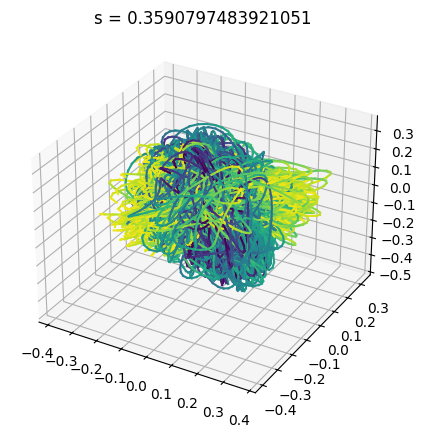

In [21]:
A = jnp.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/A_softNormMax_centerFalse_spikes.npy')
X = jnp.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/X_softNormMax_centerFalse_spikes.npy')

save_path = '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/neural_spikes'
kernel = 'gaussian'
kernel_function = K_X_Y_squared_exponential
d = 10
K, N, T = X.shape

params = jnp.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/neural_spikes/params_{d}d_{kernel}.npy', allow_pickle=True).tolist()

_, u, l2, scale = get_params(params, kernel_function=kernel_function)
K_u_u_K_u_A_alpha_H, _, _   = get_alpha(params, A, X, kernel_function, d)
X_reshaped = X.swapaxes(0,1).reshape(N,-1)
K_u_X = kernel_function(u, X_reshaped, l2=l2, scale=scale).reshape(-1,K,T).swapaxes(0,1)  
Y = jnp.einsum('ji,kjm->kim',  K_u_u_K_u_A_alpha_H, K_u_X)
Y = center(Y)
plt.figure()
plot_3D(Y)
plt.title(f's = {compute_S_all_pairs(Y)}')
plt.savefig(f'{save_path}/projection_fig_{d}d_{kernel}.png')
np.save(f'{save_path}/projection_{d}d_{kernel}', Y)
# plt.figure()
# get_loss_fig(ls_loss, ls_S_ratio)
# plt.savefig(f'{save_path}/loss_fig_{d}d_{kernel}.png')
# np.save(f'{save_path}/ls_loss_{d}d_{kernel}', np.array(ls_loss))
# np.save(f'{save_path}/ls_S_ratio_{d}d_{kernel}', np.array(ls_S_ratio))